# Optimizing Functions of One Variable: Cost Minimization

In this assignment you will solve a simple optimization problem for a function of one variable. Given a dataset of historical prices of a product from two suppliers, your task is to identify what share of the product you should buy from each of the suppliers to make the best possible investment in the future. Stating the problem mathematically, you will construct a target function to minimize, evaluate its minimum and investigate how its derivative is connected with the result.

%%
在本次作业中，你将解决一个一元函数的简单优化问题。
这里给出了一个两个供应商产品的价格的历史数据集，你的任务是确定从各供应商采购产品的最佳配比，以便为未来进行最理想的投资。
将问题以数学的方式阐述，你将构建一个最小化的目标函数，评估最小值，并考察它的导数和结果的关系。
%%

## Important Note

Please **do not delete** any exercise cells or add your solutions in a different cell. **Maintain your solution in the original cell provided**, as altering this can disrupt the autograder.

Additionally, **refrain from importing any new libraries**, and **do not import libraries within any graded cells**—doing so will interfere with the autograder's functionality.

Leaving any exercise unsolved (i.e., not replacing the 'None' values) will cause issues with the autograder. If you wish to submit your assignment without completing every exercise, for testing purposes, please follow the instructions [here](https://www.coursera.org/learn/machine-learning-calculus/item/yjJ7W).

# Table of Contents

- [ 1 - Statement of the Optimization Problem](#1)
  - [ 1.1 - Description of the Problem](#1.1)
  - [ 1.2 - Mathematical Statement of the Problem](#1.2)
  - [ 1.3 - Solution Approach](#1.3)
- [ 2 - Optimizing Function of One Variable in Python](#2)
  - [ 2.1 - Packages](#2.1)
  - [ 2.2 - Open and Analyze the Dataset](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 - Construct the Function $L$ to Optimize and Find its Minimum Point](#2.3)
    - [ Exercise 2](#ex02)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)

<a name='1'></a>
## 1 - Statement of the Optimization Problem

<a name='1.1'></a>
### 1.1 - Description of the Problem

Your Company is aiming to minimize production costs of some goods. During the production process, an essential product P is used, which can be supplied from one of two partners - supplier A and supplier B. Your consultants requested the historical prices of product P from both suppliers A and B, which were provided as monthly averages for the period from February 2018 to March 2020.

%%
你的公司致力于降低某些产品的生产成本。
在生产过程中，使用了一种必须的产品 P，供应商 A 与 B 均能提供该产品。
你的顾问需要产品 A 与 B 供应商提供产品 P 的历史价格，他们提供了 2018 年 2 月到 2020 年 3 月该产品的月均价格。
%%

Preparing Company Budget for the coming twelve months period, your plan is to purchase the same amount of product P monthly. Choosing the supplier, you noticed, that there were some periods in the past, when it would be more profitable to use supplier A (the prices of product P were lower), and other periods to work with supplier B. For the Budget model you can set some percentage of the goods to be purchased from supplier A (e.g. 60%) and the remaining part from supplier B (e.g. 40%), but this split should be kept consistent for the whole of the twelve months period. The Budget will be used in preparation for the contract negotiations with both suppliers.

%%
定制公司未来 12 个月的预算，你的计划是每月购买相同数量的 P 产品。
在选择供应商时，您注意到，在过去某些时段，选用供应商 A 会更为划算（因其产品 P 价格较低），而其他时段则与供应商 B 合作更具优势。
对于预算模型，您可以设定一部分商品从供应商 A 采购（例如 60%），其余部分则从供应商 B 采购（例如 40%），但这一分配比例需在整个十二个月期间保持一致。
这预算计划将用于准备与两家供应商进行合同谈判。
%%

Based on the historical prices, is there a particular percentage which will be more profitable to supply from Company A, and the remaining part from Company B? Or maybe it does not matter and you can work just with one of the suppliers?

%%
基于历史价格，是否存在一个特定的百分比，使得从公司 A 采购这个比例，而剩余部分从公司 B 采购，会更具盈利性？
或者也许这并不重要，你只需与其中一家供应商合作即可？
%%

<a name='1.2'></a>
### 1.2 - Mathematical Statement of the Problem

Denoting prices of the product P from Company A and Company B as $p_A$ (USD) and $p_B$ (USD) respectively, and the volume of the product to be supplied per month as $n$ (units), the total cost in USD is:

%%
用 $p_A$ (USD) 和 $p_B$ (USD) 分别表示从公司 A 和公司 B 购买产品 P 的价格，每月提供的产品数量则使用 $n$ (units)，那么总成本（美元）为：
%%

$$f\left(\omega\right) = p_A \omega \,n+ p_B \left(1 - \omega\right) n,$$

where $0\leq\omega\leq1$ is the parameter. If $\omega = 1$, all goods will be supplied from Company A, and if $\omega = 0$, from Company B. In case of $0<\omega<1$, some percentage will be allocated to both.

%%
其中 $0\leq\omega\leq1$ 为参数。
如果 $\omega = 1$，则所有的货物将由公司 A 提供，如果 $\omega = 0$，则全部来自公司 B。
在 $0<\omega<1$ 情况下，一定比例将同时分配给双方。
%%

As it is planned to keep the volume $n$ constant over the next twelve months, in the mathematical model the common approach is to put $n = 1$. You can do this, because nothing depends on the volume and the end result will be the same. Now the total cost will be simpler:

%%
鉴于未来十二个月的计划量 n 是一个常数，在数学模型中通常做法是让 $n=1$。
你可以这样做，因为没有什么变量需要依靠它，并且最后的结果都是相同的。
现在总成本的计算就简单了一些：
%%

$$f\left(\omega\right) = p_A \omega+ p_B \left(1 - \omega\right) \tag{1}$$

Obviously, you do not know the future prices $p_A$ and $p_B$, only historical values (prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ for $k$ months). And historically there were various periods of time when it was better to take $\omega = 1$ ($p_A^i < p_B^i$) or $\omega = 0$ ($p_A^i >p_B^i$). Is it possible now to choose some $\omega$ value that would provide some evidence of minimum costs in the future?

%%
显然，你不知道未来 $P_A$ 和 $P_B$ 的价格，只有历史的数值（价格 $\{p_A^1, \cdots, p_A^k\}$ 和 $\{p_B^1, \cdots, p_B^k\}$ 还有 $k$ 个月的数据涵盖）。
并且纵观历史，根据不同的时期，选择 $\omega=1$ ($p_A^i < p_B^i$) 或者 $\omega=0$ ($p_A^i >p_B^i$)都是可行的。
我们现在是否能选定一个 $\omega$ 值，从而为未来的最低成本提供一些依据？
%%


<a name='1.3'></a>
### 1.3 - Solution Approach

This is a standard **portfolio management** (investment) problem well known in statistics, where based on the historical prices you need to make investment decision to maximize profit (minimize costs). Since statistics has not been covered in this Course, you do not need to understand the details about the function $\mathcal{L}\left(\omega\right)$ (called **loss function**) to minimize, explained in the next paragraph.

%%
这是一个标准的**投资组合管理**问题，在统计学中广为人知，你需要基于历史价格做投资决策以获得最大收益（最小成本）。
由于本课程并未涉及统计学，你不需要知道关于这个 $\mathcal{L}\left(\omega\right)$ 函数（损失函数）进行最小化的具体的细节，下一段会对此进行说明。
%%

The approach is to calculate $f\left(\omega\right)$ for each of the historical prices $p_A^i$ and $p_B^i$, $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Then take an average of those values, $\overline{f\left (\omega\right)}=\text{mean}\left(f^i\left(\omega\right)\right) = \frac{1}{k}\sum_{i=1}^{k}f^i\left(\omega\right)$ and look for such value of $\omega$ which makes $f^i\left(\omega\right)$ as "stable" as possible - varying as little as possible from the average $\overline{f\left (\omega\right)}$. This means that you would want to minimize the sum of the differences $\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)$. As the differences can be negative or positive, a common approach is to take the squares of those and take an average of the squares:

%%
这个方法会针对每个历史价格 $p_A^i$ 和 $p_B^i$，计算 $f\left(\omega\right)$，$f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$。
随后取他们的平均值，即 $\overline{f\left (\omega\right)}=\text{mean}\left(f^i\left(\omega\right)\right) = \frac{1}{k}\sum_{i=1}^{k}f^i\left(\omega\right)$，然后寻找一个 $\omega$ 的值让 $f^i\left(\omega\right)$ 尽可能的稳定——也就是让它和平均值 $f(\omega)$ 的偏差尽可能的小。
这意味着把它们的差 $\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)$ 相加并将其最小化。
它们的差可能为正可能为负，一个做法的做法是取它们的平方数，然后取平方后的均值。
%%

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2\tag{2}$$

In statistics $\mathcal{L}\left(\omega\right)$ is called a variance of $\{f^1 \left(\omega\right), \cdots , f^k \left(\omega\right)\}$. The aim is to minimize the variance $\mathcal{L}\left(\omega\right)$, where $\omega\in\left[0, 1\right]$. Again, do not worry if you do not understand deeply why particularly this function $\mathcal{L}\left(\omega\right)$ was chosen. You might think if it is logical to minimize an average $\overline{f\left (\omega\right)}$, but [risk management](https://www.thebalancemoney.com/minimum-variance-portfolio-overview-4155796#:~:text=A%20minimum%20variance%20portfolio%20is,other%20out%20when%20held%20together.) theory states that in this problem variance needs to be optimized.

%%
在统计学中 $\mathcal{L}\left(\omega\right)$ 被称为 $\{f^1 \left(\omega\right), \cdots , f^k \left(\omega\right)\}$ 的[[方差]]。
目标是最小化方差 $\mathcal{L}\left(\omega\right)$，其中 $\omega\in\left[0, 1\right]$。
再次说明，如果您不理解为何选择 L(ω)这一函数，也请不必为此担心。
你可能觉得，对平均值 $\overline{f\left (\omega\right)}$ 进行最小化操作是否合理？但是风险管理理论指出，在处理此类问题时，需要优化的实际上是[[方差]]。
%%

Statistical theory shows that there is an $\omega\in\left[0, 1\right]$ value which minimizes function $\mathcal{L}\left(\omega\right)$ and it can be found using some properties of the datasets $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$. However, as this is not a Course about statistics, the example is taken to illustrate an optimization problem of one variable based on some dataset. It is a chance for you to check your understanding and practice this week material.

%%
统计理论表明，存在一个 ω ∈ [0, 1] 的值能够使函数 $\mathcal{L}\left(\omega\right)$ 最小化，而该值可以通过利用数据集 $\{p_A^1, \cdots, p_A^k\}$ 和 $\{p_B^1, \cdots, p_B^k\}$ 的某些性质来求得。
无论如何，这个课程中没有统计学，这个示例是用于说明有关基于一些数据集的单个变量的优化问题。
这为大家提供了一个机会，检验大家对本周学习内容的理解，并加以实践。
%%

Now let's upload a dataset and explore if it is possible to find a minimum point for the corresponding function $\mathcal{L}\left(\omega\right)$.

%%
现在让我们加载数据集，并探究是否能找到对应函数 $\mathcal{L}\left(\omega\right)$ 极小值的点。
%%

<a name='2'></a>
## 2 - Optimizing Function of One Variable in Python

<a name='2.1'></a>
### 2.1 - Packages

Let's import all of the required packages. In addition to the ones you have been using in this Course before, you will need to import `pandas` library. It is a commonly used package for data manipulation and analysis.

%%
让我们导入所有需要的包，除了你之前在本课中一直使用的之外，你还需要导入 `pandas` 库。
这是一个用于操作和分析数据的常用的包。
%%

In [1]:
# A function to perform automatic differentiation.
from jax import grad
# A wrapped version of NumPy to use JAX primitives.
import jax.numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# A magic command to make output of plotting commands displayed inline within the Jupyter notebook.
%matplotlib inline 

Load the unit tests defined for this notebook.

%%
导入这个单元用于测试的 notebook。
%%

In [2]:
import w1_unittest

# Please ignore the warning message about GPU/TPU if it appears.

<a name='2.2'></a>
### 2.2 - Open and Analyze the Dataset

Historical prices for both suppliers A and B are saved in the file `data/prices.csv`. To open it you can use `pandas` function `read_csv`. This example is very simple, there is no need to use any other parameters.

%%
历史价格来自两家供应商 A 与 B，它们保存在文件 `data/prices.csv` 中。
打开它你可以使用 `pandas` 函数 `read_csv`。
这个示例非常简单，这里不需要任何其他参数。
%%

In [3]:
df = pd.read_csv('data/prices.csv')

The data is now saved in the variable `df` as a **DataFrame**, which is the most commonly used `pandas` object. It is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a table or a spreadsheet. Full documentation can be found [here](https://pandas.pydata.org/).

%%
数据现在存储在类型为 DataFrame 的变量 `df` 中，这里通常使用 `pandas` 对象。
它是一个二维的标签化数据结构，它的列可以包含不同类型的数据。
你可以认为它是一个电子表格。
完整的文档可以参阅[这里](https://pandas.pydata.org/)
%%


In [4]:
df

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81
5,1/07/2016,105,84
6,1/08/2016,114,90
7,1/09/2016,102,93
8,1/10/2016,105,93
9,1/11/2016,101,99


To print a list of the column names use `columns` attribute of the DataFrame:

%%
要打印出 df 的列的 list 可以使用 DataFrame 的 `columns` 属性。
%%

In [5]:
print(df.columns)

Index(['date', 'price_supplier_a_dollars_per_item',
       'price_supplier_b_dollars_per_item'],
      dtype='object')


Reviewing the displayed table and the column names you can conclude that monthly prices are provided (in USD) and you only need the data from the columns `price_supplier_a_dollars_per_item` and `price_supplier_b_dollars_per_item`. In real life the datasets are significantly larger and require a proper review and cleaning before injection into models. But this is not the focus of this Course. 

%%
再次观察这个表格和它的列名，你可以得到这是提供的月度价格（USD），并且你需要的数据仅仅是 `price_supplier_a_dollars_per_item` 和 `price_supplier_b_dollars_per_item` 两列。
在现实场景中数据集显然比这个大得多，并且需要恰当的检查和清理之后再注入模型。
但是在这个课程中，我们不需要关注这个。
%%

To access the values of one column of the DataFrame you can use the column name as an attribute. For example, the following code will output `date` column of the DataFrame `df`:

%%
在 DataFrame 中访问这个数据的其中一列你可以使用列命作为其属性。
在示例中，下面的代码将输出这个 DataFrame 变量 `df` 的 `date` 列。
%%

In [6]:
df.date

0     1/02/2016
1     1/03/2016
2     1/04/2016
3     1/05/2016
4     1/06/2016
5     1/07/2016
6     1/08/2016
7     1/09/2016
8     1/10/2016
9     1/11/2016
10    1/12/2016
11    1/01/2017
12    1/02/2017
13    1/03/2017
14    1/04/2017
15    1/05/2017
16    1/06/2017
17    1/07/2017
18    1/08/2017
19    1/09/2017
20    1/10/2017
21    1/11/2017
22    1/12/2017
23    1/01/2018
24    1/02/2018
25    1/03/2018
26    1/04/2018
27    1/05/2018
28    1/06/2018
29    1/07/2018
30    1/08/2018
31    1/09/2018
32    1/10/2018
33    1/11/2018
34    1/12/2018
35    1/01/2019
36    1/02/2019
37    1/03/2019
38    1/04/2019
39    1/05/2019
40    1/06/2019
41    1/07/2019
42    1/08/2019
43    1/09/2019
44    1/10/2019
45    1/11/2019
46    1/12/2019
47    1/01/2020
48    1/02/2020
49    1/03/2020
Name: date, dtype: object

<a name='ex01'></a>
### Exercise 1

Load the historical prices of supplier A and supplier B into variables `prices_A` and `prices_B`, respectively. Convert the price values into `NumPy` arrays with elements of type `float32` using `np.array` function.

%%
分别读取供应商 A 和供应商 B 的历史价格到变量 `prices_A` 和 `prices_B`。
使用 `np.array` 函数将价格值转换为 `float32` 类型的 NumPy 数组。
%%

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>The corresponding prices are in the DataFrame `df`, columns `price_supplier_a_dollars_per_item` and `price_supplier_b_dollars_per_item`.</li>
    <li>Conversion into the `NumPy` array can be performed with the function `np.array`.</li>
</ul>
</p>

In [7]:
### START CODE HERE ### (~ 4 lines of code)
prices_A = df.price_supplier_a_dollars_per_item
prices_B = df.price_supplier_b_dollars_per_item
prices_A = np.array(prices_A).astype('float32')
prices_B = np.array(prices_B).astype('float32')
### END CODE HERE ###

In [8]:
# Print some elements and mean values of the prices_A and prices_B arrays.
print("Some prices of supplier A:", prices_A[0:5])
print("Some prices of supplier B:", prices_B[0:5])
print("Average of the prices, supplier A:", np.mean(prices_A))
print("Average of the prices, supplier B:", np.mean(prices_B))

Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0


##### __Expected Output__ 

```Python
Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0
```

Average prices from both suppliers are similar. But if you will plot the historical prices, you will see that there were periods of time when the prices were lower for supplier A, and vice versa.

%%
两个供货商的平均价格差不多。
但是你如果绘制这个历史价格曲线，你将看到供应商 A 价格较低的时期，反之亦然。
%%

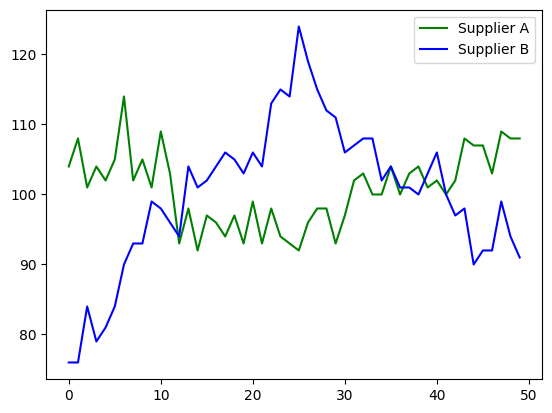

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(prices_A, 'g', label="Supplier A")
plt.plot(prices_B, 'b', label="Supplier B")
plt.legend()

plt.show()

Based on the historical data, can you tell which supplier it will be more profitable to work with? As discussed in the section [1.3](#1.3), you need to find such an $\omega \in \left[0, 1\right]$ which will minimize function $(2)$.

%%
基于这个历史数据，你能看出和哪个供应商合作会更有利可图吗？
就像在章节 1.3 讨论的那样，你需要找到一个 $\omega \in \left[0, 1\right]$，使得函数 $(2)$ 最小化。
%%

<a name='2.3'></a>
### 2.3 - Construct the Function $\mathcal{L}$ to Optimize and Find its Minimum Point

<a name='ex02'></a>
### Exercise 2

Calculate `f_of_omega`, corresponding to the $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ can be passed in the arrays `pA` and `pB`. Thus, multiplying them by the scalars `omega` and `1 - omega` and adding together the resulting arrays, you will get an array containing $\{f^1\left(\omega\right), \cdots, f^k\left(\omega\right)\}$.

%%
计算 `f_of_omega`，它相对应的是函数 $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$。
价格 $\{p_A^1, \cdots, p_A^k\}$ 和 $\{p_B^1, \cdots, p_B^k\}$ 则作为数组传入 `pA` 和 `pB`。
因此，乘以它们的标量 `omega` 和 `1-omega`，然后加在一起得到结果数组，然后就得到了数组 $\{f^1\left(\omega\right), \cdots, f^k\left(\omega\right)\}$。
%%

Then array `f_of_omega` can be taken to calculate `L_of_omega`, according to the expression $(2)$:

%%
然后，就可以利用 `f_of_omega` 数组，根据表达式 (2) 计算 `L_of_omega`：
%%

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2$$

In [10]:
def f_of_omega(omega, pA, pB):
    ### START CODE HERE ### (~ 1 line of code)
    f = pA * omega + pB * (1-omega)
    ### END CODE HERE ###
    return f

def L_of_omega(omega, pA, pB):
    return 1/len(f_of_omega(omega, pA, pB)) * np.sum((f_of_omega(omega, pA, pB) - np.mean(f_of_omega(omega, pA, pB)))**2)

In [11]:
print("L(omega = 0) =",L_of_omega(0, prices_A, prices_B))
print("L(omega = 0.2) =",L_of_omega(0.2, prices_A, prices_B))
print("L(omega = 0.8) =",L_of_omega(0.8, prices_A, prices_B))
print("L(omega = 1) =",L_of_omega(1, prices_A, prices_B))

L(omega = 0) = 110.72
L(omega = 0.2) = 61.156796
L(omega = 0.8) = 11.212797
L(omega = 1) = 27.48


##### __Expected Output__ 

```Python
L(omega = 0) = 110.72
L(omega = 0.2) = 61.1568
L(omega = 0.8) = 11.212797
L(omega = 1) = 27.48
```

Analysing the output above, you can notice that values of the function $\mathcal{L}$ are decreasing for $\omega$ increasing from $0$ to $0.2$, then to $0.8$, but there is an increase of the function $\mathcal{L}$ when $\omega = 1$. What will be the $\omega$ giving the minimum value of the function $\mathcal{L}$?

%%
分析上面的输出，你可以注意到随着 $\omega$ 从 0 到 0.2，再到 0.8 递增，函数 $\mathcal{L}$ 的值则在递减，但是当 $\omega=1$ 的时候，函数 $\mathcal{L}$ 反而增加了。
所以可以使函数 $\mathcal{L}$ 达到最小值的 $\omega$ 将会是多少？
%%

In this simple example $\mathcal{L}\left(\omega\right)$ is a function of one variable and the problem of finding its minimum point with a certain accuracy is a trivial task. You just need to calculate function values for each $\omega = 0, 0.001, 0.002, \cdots , 1$ and find minimum element of the resulting array.

%%
在这个简单的例子中，函数 $\mathcal{L}(\omega)$ 仅有一个变量，且问题仅仅时寻找它的最低点，需要达到一定精度是小菜一碟。
你仅仅需要计算函数的每个值，比如当 $\omega$ 等于 0，等于 0.001，等于 0.002，最后等于 1，通过这样的方式找出结果数组中的最小元素。
%%

Function `L_of_omega` will not work if you will pass an array instead of a single value of `omega` (it was not designed for that). It is possible to rewrite it in a way that it would be possible, but here there is no need in that right now - you can calculate the resulting values in the loop as there will be not as many of them.

%%
如果你通过一个数组来替换单个值的来计算 `omega` （虽然它并不是为以此为目的设计的），那么函数 `L_of_omega` 将毫无用处。
可以将其改写成可行的方式，但目前我们不需要这样做，你可以通过循环计算出这个结果值，因为它们的数量并不会太多。
%%

<a name='ex03'></a>
### Exercise 3

Evaluate function `L_of_omega` for each of the elements of the array `omega_array` and pass the result into the corresponding element of the array `L_array` with the function `.at[<index>].set(<value>)`.

%%
对数组 `omega_array` 中的每个元素计算函数 `L_of_omega`，并通过 `.at[<index>].set(<value>)` 函数将结果赋给 `L_array` 数组中对应的元素。
%%

*Note*: `jax.numpy` has been uploaded instead of the original `NumPy`. Up to this moment `jax` functionality has not been actually used, but it will be called in the cells below. Thus there was no need to upload both versions of the package, and you have to use `.at[<index>].set(<value>)` function to update the array.

%%
*注意*：
`jax.numpy` 已经加载并替换了原始的 `NumPy`。
到目前为止 `jax` 函数尚未使用，但是它将在下面的单元格中调用。
因此这里不需要加载两个版本的包，并且你可以使用 `.at[<index>].set(<value>)` 函数更新数组。
%%

In [12]:
# Parameter endpoint=True will allow ending point 1 to be included in the array.
# This is why it is better to take N = 1001, not N = 1000
N = 1001
omega_array = np.linspace(0, 1, N, endpoint=True)

# This is organised as a function only for grading purposes.
def L_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    L_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        L = L_of_omega(omega_array[i], pA, pB)
        L_array = L_array.at[i].set(L)
        ### END CODE HERE ###

    return L_array

L_array = L_of_omega_array(omega_array, prices_A, prices_B)

In [13]:
print("L(omega = 0) =",L_array[0])
print("L(omega = 1) =",L_array[N-1])

L(omega = 0) = 110.72
L(omega = 1) = 27.48


##### __Expected Output__ 

```Python
L(omega = 0) = 110.72
L(omega = 1) = 27.48
```

Now a minimum point of the function $\mathcal{L}\left(\omega\right)$ can be found with a `NumPy` function `argmin()`. As there were $N = 1001$ points taken in the segment $\left[0, 1\right]$, the result will be accurate to three decimal places:

%%
现在通过 `NumPy` 函数的 `argmin()` 可以找到函数 $\mathcal{L}\left(\omega\right)$ 最小点。
由于在区间 $[0, 1]$ 内取了 $N=1001$ 个点，所以结果可以精确到小数点后三位。
%%

In [14]:
i_opt = L_array.argmin()
omega_opt = omega_array[i_opt]
L_opt = L_array[i_opt]
print(f'omega_min = {omega_opt:.3f}\nL_of_omega_min = {L_opt:.7f}')

omega_min = 0.702
L_of_omega_min = 9.2497196


This result means that, based on the historical data, $\omega = 0.702$ is expected to be the most profitable choice for the share between suppliers A and B. It is reasonable to plan $70.2\%$ of product P to be supplied from Company A, and $29.8\%$ from Company B. 

%%
这个结果表面，基于历史数据，预计 $\omega=0.702$ 是 A 和B 供应商份额划分最具营利性的选择。
合理规划产品 P 的 70.2%的份额由 A 公司供应，剩下的29.8%由 B 公司提供。
%%

If you would like to improve the accuracy, you just need to increase the number of points N. This is a very simple example of a model with one parameter, resulting in optimization of a function of one variable. It is computationally cheap to evaluate it in many points to find the minimum with certain accuracy. But in machine learning the models have hundreds of parameters, using similar approach you would need to perform millions of target function evaluations. This is not possible in most of the cases, and that's where Calculus with its methods and approaches comes into play. 

%%
如果你想要提高准确性，你只需要增加这里的数值 N。
这是一个非常简单的单参数模型示例，最终优化的是单变量函数。
以较低的计算成本在多个点进行评估，便能以一定的精度找到最小值。
但是在机器学习模型里有上百个参数，使用相同方法你需要执行上百万次目标函数的计算。
在大多数情况下这是不可能的，而这就是微积分及其方法发挥作用的地方。
%%

In the next weeks of this Course you will learn how to optimize multivariate functions using differentiation. But for now as you are on the learning curve, let's evaluate the derivative of the function $\mathcal{L}\left(\omega\right)$ at the points saved in the array `omega_array` to check that at the minimum point the derivative is actually the closest to zero. 

%%
下一周的课程你将会学习使用导数如何优化多变量函数。
然而，鉴于你目前尚处于学习摸索阶段，我们来计算函数 $\mathcal{L}\left(\omega\right)$ 在 `omega_array` 数组中保存的各点处的导数，以验证在极小值点处，导数确实最接近零。
%%

<a name='ex04'></a>
### Exercise 4

For each $\omega$ in the `omega_array` calculate $\frac{d\mathcal{L}}{d\omega}$ using `grad()` function from `JAX` library. Remember that you need to pass the function which you want to differentiate (here $\mathcal{L}\left(\omega\right)$) as an argument of `grad()` function and then evaluate the derivative for the corresponding element of the `omega_array`. Then pass the result into the corresponding element of the array `dLdOmega_array` with the function `.at[<index>].set(<value>)`.

%%
使用 `JAX` 库的 `grad()` 函数计算每个 `omega_array` 中的每一个 $\omega$。
记住，你需要把你想微分的函数 (这里是 $\mathcal{L}\left(\omega\right)$) 作为函数 `grad()` 的参数，然后计算导数在 `omega_array` 对应的元素上的值。”
然后，使用 `.at[<index>].set(<value>)` 这个函数，将结果传入 `dLdOmega_array` 这个数组的相应元素中。
%%

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Function $\mathcal{L}\left(\omega\right)$ is implemented in the code as `L_of_omega`.</li>
</ul>
</p>

In [16]:
# This is organised as a function only for grading purposes.
def dLdOmega_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    dLdOmega_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        dLdOmega = grad(L_of_omega)(omega_array[i], pA, pB)
        dLdOmega_array = dLdOmega_array.at[i].set(dLdOmega)
        ### END CODE HERE ###

    return dLdOmega_array

dLdOmega_array = dLdOmega_of_omega_array(omega_array, prices_A, prices_B)

In [17]:
print("dLdOmega(omega = 0) =",dLdOmega_array[0])
print("dLdOmega(omega = 1) =",dLdOmega_array[N-1])

dLdOmega(omega = 0) = -288.95984
dLdOmega(omega = 1) = 122.48001


##### __Expected Output__ 

```Python
dLdOmega(omega = 0) = -288.96
dLdOmega(omega = 1) = 122.47999
```

In [18]:
w1_unittest.test_dLdOmega_of_omega_array(dLdOmega_of_omega_array)

 All tests passed


Now to find the closest value of the derivative to $0$, take absolute values $\left|\frac{d\mathcal{L}}{d\omega}\right|$ for each omega and find minimum of them.

%%
现在取找到接近 0 的导数，取每个 omega 绝对值 $\left|\frac{d\mathcal{L}}{d\omega}\right|$，然后找到最小值。 
%%

In [19]:
i_opt_2 = np.abs(dLdOmega_array).argmin()
omega_opt_2 = omega_array[i_opt_2]
dLdOmega_opt_2 = dLdOmega_array[i_opt_2]
print(f'omega_min = {omega_opt_2:.3f}\ndLdOmega_min = {dLdOmega_opt_2:.7f}')

omega_min = 0.702
dLdOmega_min = -0.1291218


The result is the same: $\omega = 0.702$. Let's plot $\mathcal{L}\left(\omega\right)$ and $\frac{d\mathcal{L}}{d\omega}$ to visualize the graphs of them, minimum point of the function $\mathcal{L}\left(\omega\right)$ and the point where its derivative is around $0$:

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_158187/3458860420.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_array,  L_array, "black", label = "$\mathcal{L}\\left(\omega\\right)$")
/tmp/ipykernel_158187/3458860420.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_array,  dLdOmega_array, "orange", label = "$\mathcal{L}\'\\left(\omega\\right)$")


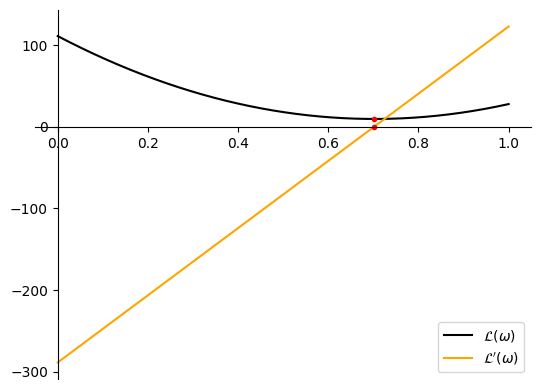

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Setting the axes at the origin.
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(omega_array,  L_array, "black", label = "$\mathcal{L}\\left(\omega\\right)$")
plt.plot(omega_array,  dLdOmega_array, "orange", label = "$\mathcal{L}\'\\left(\omega\\right)$")
plt.plot([omega_opt, omega_opt_2], [L_opt,dLdOmega_opt_2], 'ro', markersize=3)

plt.legend()

plt.show()

Congratulations, you have finished the assignment for this week! This example illustrates how optimization problems may appear in real life, and gives you an opportunity to explore the simple case of minimizing a function with one variable. Now it is time to learn about optimization of multivariate functions!

%%
恭喜你，你完成了本周的作业！
这个示例阐明了如何在真实生活中解决优化问题，并且给了你一个机会探索这个简单的案例——最小化单变量函数。
现在是时候学习关于优化多变量函数的课程了。
%%